In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

### Json file that I'll get from the webapp

In [5]:
elements_const = ['Myself right now', 
                  'Myself as I would like to be',
                  'Myself with my boss',
                  'Myself with a co-worker I dislike',
                  'Myself in a tense meeting',
                  'Myself after a bad day',
                  'Myself after a good day',
                  'Myself with family'
                 ]
constructs_const = ['successful(1) / unsuccessful(7)',
                    'hard-working(1) / lazy(7)',
                    'positive(1) / negative(7)',
                    'friendly(1) /  unfriendly(7)',
                    'quiet(1) / talkative(7)',
                    'boring(1) / fun(7)',
                    'happy(1) / unhappy(7)',
                    'understanding(1) / not understanding(7)',
                    'motivated(1) / unmotivated(7)',
                    'confident(1) / not confident(7)'
]

In [6]:
constructs_const

['successful(1) / unsuccessful(7)',
 'hard-working(1) / lazy(7)',
 'positive(1) / negative(7)',
 'friendly(1) /  unfriendly(7)',
 'quiet(1) / talkative(7)',
 'boring(1) / fun(7)',
 'happy(1) / unhappy(7)',
 'understanding(1) / not understanding(7)',
 'motivated(1) / unmotivated(7)',
 'confident(1) / not confident(7)']

In [7]:
print(len(constructs_const))
print(constructs_const[0])

10
successful(1) / unsuccessful(7)


In [8]:
input_const = [
    {
    'name_construct': constructs_const[0],
        'elements': [
        {
            'name': elements_const[0],
            'rating': 3,
        },
        {
            'name': elements_const[1],
            'rating': 1,
        },
        {
            'name': elements_const[2],
            'rating': 4,
        },
        {
            'name': elements_const[3],
            'rating': 3,
        },
        {
            'name': elements_const[4],
            'rating': 3,
        },
        {
            'name': elements_const[5],
            'rating': 4,
        },
        {
            'name': elements_const[6],
            'rating': 2,
        },
        {
            'name': elements_const[7],
            'rating': 2,
        }
    ]
    },
    {
    'name_construct': constructs_const[1],
        'elements': [
        {
            'name': elements_const[0],
            'rating': 4,
        },
        {
            'name': elements_const[1],
            'rating': 2,
        },
        {
            'name': elements_const[2],
            'rating': 3,
        },
        {
            'name': elements_const[3],
            'rating': 5,
        },
        {
            'name': elements_const[4],
            'rating': 4,
        },
        {
            'name': elements_const[5],
            'rating': 5,
        },
        {
            'name': elements_const[6],
            'rating': 1,
        },
        {
            'name': elements_const[7],
            'rating': 6,
        }
        ]
    },
    {
    'name_construct': constructs_const[2],
        'elements': [
        {
            'name': elements_const[0],
            'rating': 2,
        },
        {
            'name': elements_const[1],
            'rating': 2,
        },
        {
            'name': elements_const[2],
            'rating': 2,
        },
        {
            'name': elements_const[3],
            'rating': 6,
        },
        {
            'name': elements_const[4],
            'rating': 5,
        },
        {
            'name': elements_const[5],
            'rating': 6,
        },
        {
            'name': elements_const[6],
            'rating': 1,
        },
        {
            'name': elements_const[7],
            'rating': 3,
        }
        ]
    },
    {
    'name_construct': constructs_const[3],
        'elements': [
        {
            'name': elements_const[0],
            'rating': 4,
        },
        {
            'name': elements_const[1],
            'rating': 2,
        },
        {
            'name': elements_const[2],
            'rating': 3,
        },
        {
            'name': elements_const[3],
            'rating': 5,
        },
        {
            'name': elements_const[4],
            'rating': 5,
        },
        {
            'name': elements_const[5],
            'rating': 5,
        },
        {
            'name': elements_const[6],
            'rating': 2,
        },
        {
            'name': elements_const[7],
            'rating': 5,
        }
        ]
    },
        {
        'name_construct': constructs_const[4],
        'elements': [
        {
            'name': elements_const[0],
            'rating': 5,
        },
        {
            'name': elements_const[1],
            'rating': 5,
        },
        {
            'name': elements_const[2],
            'rating': 4,
        },
        {
            'name': elements_const[3],
            'rating': 4,
        },
        {
            'name': elements_const[4],
            'rating': 5,
        },
        {
            'name': elements_const[5],
            'rating': 3,
        },
        {
            'name': elements_const[6],
            'rating': 5,
        },
        {
            'name': elements_const[7],
            'rating': 4,
        }
        ]
    },
    {
    'name_construct': constructs_const[5],
        'elements': [
        {
            'name': elements_const[0],
            'rating': 6,
        },
        {
            'name': elements_const[1],
            'rating': 7,
        },
        {
            'name': elements_const[2],
            'rating': 4,
        },
        {
            'name': elements_const[3],
            'rating': 2,
        },
        {
            'name': elements_const[4],
            'rating': 4,
        },
        {
            'name': elements_const[5],
            'rating': 2,
        },
        {
            'name': elements_const[6],
            'rating': 6,
        },
        {
            'name': elements_const[7],
            'rating': 5,
        }
        ]
    },
    {
    'name_construct': constructs_const[6],
        'elements': [
        {
            'name': elements_const[0],
            'rating': 2,
        },
        {
            'name': elements_const[1],
            'rating': 2,
        },
        {
            'name': elements_const[2],
            'rating': 4,
        },
        {
            'name': elements_const[3],
            'rating': 5,
        },
        {
            'name': elements_const[4],
            'rating': 4,
        },
        {
            'name': elements_const[5],
            'rating': 6,
        },
        {
            'name': elements_const[6],
            'rating': 1,
        },
        {
            'name': elements_const[7],
            'rating': 3,
        }
        ]
    },
    {
    'name_construct': constructs_const[7],
        'elements': [
        {
            'name': elements_const[0],
            'rating': 4,
        },
        {
            'name': elements_const[1],
            'rating': 1,
        },
        {
            'name': elements_const[2],
            'rating': 3,
        },
        {
            'name': elements_const[3],
            'rating': 5,
        },
        {
            'name': elements_const[4],
            'rating': 4,
        },
        {
            'name': elements_const[5],
            'rating': 6,
        },
        {
            'name': elements_const[6],
            'rating': 2,
        },
        {
            'name': elements_const[7],
            'rating': 3,
        }
        ]
    },
    {
    'name_construct': constructs_const[8],
        'elements': [
        {
            'name': elements_const[0],
            'rating': 3,
        },
        {
            'name': elements_const[1],
            'rating': 1,
        },
        {
            'name': elements_const[2],
            'rating': 2,
        },
        {
            'name': elements_const[3],
            'rating': 6,
        },
        {
            'name': elements_const[4],
            'rating': 3,
        },
        {
            'name': elements_const[5],
            'rating': 6,
        },
        {
            'name': elements_const[6],
            'rating': 2,
        },
        {
            'name': elements_const[7],
            'rating': 3,
        }
        ]
    },
    {
    'name_construct': constructs_const[9],
        'elements': [
        {
            'name': elements_const[0],
            'rating': 3,
        },
        {
            'name': elements_const[1],
            'rating': 2,
        },
        {
            'name': elements_const[2],
            'rating': 2,
        },
        {
            'name': elements_const[3],
            'rating': 2,
        },
        {
            'name': elements_const[4],
            'rating': 4,
        },
        {
            'name': elements_const[5],
            'rating': 4,
        },
        {
            'name': elements_const[6],
            'rating': 1,
        },
        {
            'name': elements_const[7],
            'rating': 1,
        }
        ]
    },
]


# Code 

## Parsing input

### Extract elements, constructs, and ratings

In [9]:
for i in input_const:
    print(i)
    break

{'name_construct': 'successful(1) / unsuccessful(7)', 'elements': [{'name': 'Myself right now', 'rating': 3}, {'name': 'Myself as I would like to be', 'rating': 1}, {'name': 'Myself with my boss', 'rating': 4}, {'name': 'Myself with a co-worker I dislike', 'rating': 3}, {'name': 'Myself in a tense meeting', 'rating': 3}, {'name': 'Myself after a bad day', 'rating': 4}, {'name': 'Myself after a good day', 'rating': 2}, {'name': 'Myself with family', 'rating': 2}]}


In [10]:
def extract_elems_and_constructs(input_json):
    contructs = []
    elements = []
    i = 0
    for vals in input_json:
        contructs.append(vals['name_construct'])
        if i ==0:
            for j in vals['elements']:
                elements.append(j['name'])
            i=1
    return contructs, elements
constructs, elements = extract_elems_and_constructs(input_const)
print(constructs, elements)

['successful(1) / unsuccessful(7)', 'hard-working(1) / lazy(7)', 'positive(1) / negative(7)', 'friendly(1) /  unfriendly(7)', 'quiet(1) / talkative(7)', 'boring(1) / fun(7)', 'happy(1) / unhappy(7)', 'understanding(1) / not understanding(7)', 'motivated(1) / unmotivated(7)', 'confident(1) / not confident(7)'] ['Myself right now', 'Myself as I would like to be', 'Myself with my boss', 'Myself with a co-worker I dislike', 'Myself in a tense meeting', 'Myself after a bad day', 'Myself after a good day', 'Myself with family']


In [11]:
def extract_matrix_rating(input_json):
    # Get the rating for each construct
    matrix_rating = [[]]
    band = True
    for vals in input_json:
        aux = []
        for e in vals['elements']: 
            aux.append(e['rating'])
        if band:
            matrix_rating[0]=aux
            band=False
        else:
            matrix_rating.append(aux) 
    return matrix_rating
matrix_rating = extract_matrix_rating(input_const)
print(matrix_rating)

[[3, 1, 4, 3, 3, 4, 2, 2], [4, 2, 3, 5, 4, 5, 1, 6], [2, 2, 2, 6, 5, 6, 1, 3], [4, 2, 3, 5, 5, 5, 2, 5], [5, 5, 4, 4, 5, 3, 5, 4], [6, 7, 4, 2, 4, 2, 6, 5], [2, 2, 4, 5, 4, 6, 1, 3], [4, 1, 3, 5, 4, 6, 2, 3], [3, 1, 2, 6, 3, 6, 2, 3], [3, 2, 2, 2, 4, 4, 1, 1]]


In [12]:
matrix_rating

[[3, 1, 4, 3, 3, 4, 2, 2],
 [4, 2, 3, 5, 4, 5, 1, 6],
 [2, 2, 2, 6, 5, 6, 1, 3],
 [4, 2, 3, 5, 5, 5, 2, 5],
 [5, 5, 4, 4, 5, 3, 5, 4],
 [6, 7, 4, 2, 4, 2, 6, 5],
 [2, 2, 4, 5, 4, 6, 1, 3],
 [4, 1, 3, 5, 4, 6, 2, 3],
 [3, 1, 2, 6, 3, 6, 2, 3],
 [3, 2, 2, 2, 4, 4, 1, 1]]

In [13]:
matrix_rating[9][0]

3

In [14]:
print(matrix_rating[0][0])
print(matrix_rating[1][0])
print(matrix_rating[2][0])

3
4
2


In [15]:
len(matrix_rating)

10

In [16]:
# cast matrix into a numpy type
rep_grid = np.array(matrix_rating)
#rep_grid = np.array([matrix_rating])

In [17]:
a = np.array(matrix_rating)
 


In [18]:
print(a)

[[3 1 4 3 3 4 2 2]
 [4 2 3 5 4 5 1 6]
 [2 2 2 6 5 6 1 3]
 [4 2 3 5 5 5 2 5]
 [5 5 4 4 5 3 5 4]
 [6 7 4 2 4 2 6 5]
 [2 2 4 5 4 6 1 3]
 [4 1 3 5 4 6 2 3]
 [3 1 2 6 3 6 2 3]
 [3 2 2 2 4 4 1 1]]


In [19]:
matrix_rating[0]

[3, 1, 4, 3, 3, 4, 2, 2]

In [20]:
a = np.array([])
a = np.append(a, [a, matrix_rating[0]])
a = np.append(a, [a, matrix_rating[1]])

In [21]:
print(a)

[array([], dtype=float64) list([3, 1, 4, 3, 3, 4, 2, 2])
 array([array([], dtype=float64), list([3, 1, 4, 3, 3, 4, 2, 2])],
      dtype=object)
 list([4, 2, 3, 5, 4, 5, 1, 6])]


In [22]:
def inverse_matrix(matrix_rating):
    mat_constructs = [[]]
    for i in range(0,len(matrix_rating[0])):
        aux = []
        for j in range(0,len(matrix_rating)):
            aux.append(matrix_rating[j][i])
        if i == 0:
            mat_constructs[0] = aux
        else:
            mat_constructs.append(aux)
    mat_constructs = np.array(mat_constructs)
    return mat_constructs
rep_grid_const = inverse_matrix(matrix_rating)

In [23]:
rep_grid_const

array([[3, 4, 2, 4, 5, 6, 2, 4, 3, 3],
       [1, 2, 2, 2, 5, 7, 2, 1, 1, 2],
       [4, 3, 2, 3, 4, 4, 4, 3, 2, 2],
       [3, 5, 6, 5, 4, 2, 5, 5, 6, 2],
       [3, 4, 5, 5, 5, 4, 4, 4, 3, 4],
       [4, 5, 6, 5, 3, 2, 6, 6, 6, 4],
       [2, 1, 1, 2, 5, 6, 1, 2, 2, 1],
       [2, 6, 3, 5, 4, 5, 3, 3, 3, 1]])

# Plot heatmap with the ratings

In [24]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

### Using the heatmap functions above

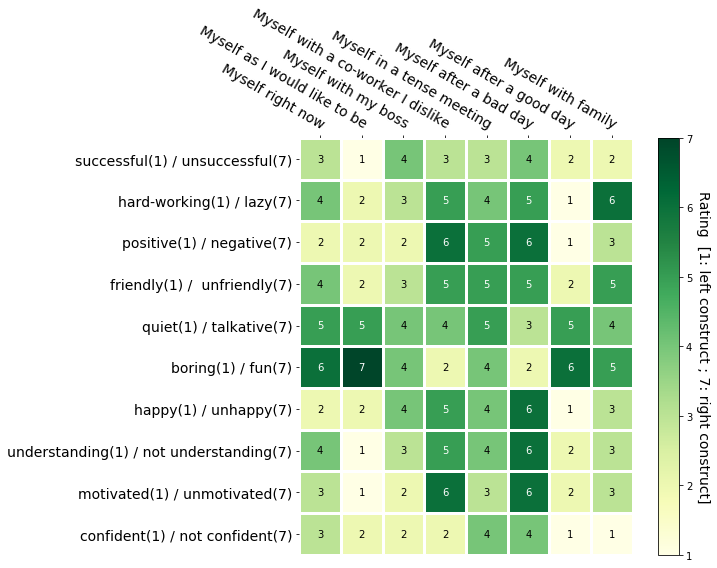

In [25]:
fig, ax = plt.subplots(figsize=(10,8))
im, cbar = heatmap(rep_grid, constructs, elements, ax=ax,
                   cmap="YlGn", cbarlabel="Rating  [1: left construct ; 7: right construct]")
ax.figure.axes[-1].yaxis.label.set_size(14)
texts = annotate_heatmap(im, valfmt="{x:.0f}")
plt.xticks(size=14)
plt.yticks(size=14)
fig.tight_layout()
#file_name_fig = 'rep_grid_user_'+str(user)+'.png'
#plt.savefig(file_name_fig)
plt.show()


### Calculate discrepancies, correlations, profiles, and most important construct

In [26]:
constructs_const[0].split('/')[1].split('(')[0]

' unsuccessful'

In [27]:
rep_grid[0][0]

3

In [28]:
def calc_constructs_to_improve(rep_grid, constructs, self_ind=0, ideal_ind=1):
    out_const = []
    ind=0
    for vec in rep_grid:
        if np.abs(vec[self_ind]-vec[ideal_ind])>=3:
            out_const.append(constructs[ind])
        ind+=1
    return out_const
out_const = calc_constructs_to_improve(rep_grid=rep_grid, constructs=constructs, self_ind=0, ideal_ind=1)
print('Constructs that you should focus on improving')
print(out_const)


Constructs that you should focus on improving
['understanding(1) / not understanding(7)']


In [29]:
def get_column(rep_grid, ind):
    out_ = []
    for vec in rep_grid:
        out_.append(vec[ind])
    return out_
print(get_column(rep_grid,1))

[1, 2, 2, 2, 5, 7, 2, 1, 1, 2]


In [30]:
tttt

NameError: name 'tttt' is not defined

In [ ]:
rep_grid

In [ ]:
tttt =np.array([[ 1, 1, 4, 4, 1, 1 ],
  [ 1, 1, 4, 4, 1, 1 ],
  [ 1, 4, 4, 4, 1, 1 ],
  [ 1, 1, 1, 1, 1, 1 ],
  [ 1, 1, 1, 1, 1, 1 ],
  [ 1, 1, 1, 1, 1, 1 ],
  [ 1, 1, 1, 1, 1, 1 ],
  [ 1, 1, 1, 1, 1, 1 ],
  [ 1, 1, 1, 1, 1, 1 ],
  [ 1, 1, 1, 1, 1, 1 ] ])

In [31]:
pearsonr([ 1, 1, 4, 4, 1, 1 ], [ 1, 4, 4, 4, 1, 1 ])

(0.7071067811865476, 0.11611652351681553)

In [32]:
def calc_corr_self_ideal(rep_grid, self_ind=0, ideal_ind=1):
    self_ = get_column(rep_grid, ind = self_ind)
    print('self_')
    print(self_)
    ideal_ = get_column(rep_grid, ind = ideal_ind)
    print('ideal_')
    print(ideal_)
    corr, _ = pearsonr(self_, ideal_)
    print('corr = ' , corr)
    #print('pearson cor: ', corr)
    #corr, _ = spearmanr(self_, ideal_)
    #print('spearman cor: ', corr)
    return corr

score = calc_corr_self_ideal(rep_grid=tttt, self_ind=0, ideal_ind=1)
print("score")
print(score)
if score >= 0.7:
    print('You have HIGH correlation between who you are and WHO you would like to be -- this could manisfest in HIGH self-confidence')
elif score < 0:
    print('You have LOW correlation between who you are and WHO you would like to be -- this could manisfest in LOW selfself-esteemteem')
else:
    print('You have a MODERATE correlation between who you are and who you would like to be')

NameError: name 'tttt' is not defined

In [33]:
a = np.arange(0,int(np.size(rep_grid)/len(rep_grid)))
print(a)
a = a[np.arange(len(a))!=1]
print(a)

[0 1 2 3 4 5 6 7]
[0 2 3 4 5 6 7]


In [34]:
def calc_corr_other_ideal(rep_grid, self_ind=1):
    corr_vec=[]
    self_ = get_column(rep_grid, ind = self_ind)
    others_ = np.arange(0,int(np.size(rep_grid)/len(rep_grid)))
    others_ = others_[np.arange(len(others_))!=self_ind]
    for val in others_:
        oth_ = get_column(rep_grid, ind = val)
        print('self_ ', self_)
        print('oth_ ', oth_)
        print('correlation = ',pearsonr(self_, oth_))
        corr, _ = pearsonr(self_, oth_)
        corr_vec.append(corr)
    print('vector = ',corr_vec)
    return np.mean(corr_vec)

score = calc_corr_other_ideal(rep_grid=tttt, self_ind=0)
print("score")
print(score)
if score<0.00001:
    print('The current situations are NOT great!')
else:
    print('On average, the situations experienced at work are great! ')

NameError: name 'tttt' is not defined

In [35]:
def calc_bad_situations(rep_grid, constructs, elements, self_ind=0, ideal_ind=1):
    out_elem = []
    out_const = []
    ind=0
    for vec in rep_grid:
        if np.abs(vec[self_ind]-vec[ideal_ind])<=1:
            self_ = np.abs(vec[2:len(vec)]-vec[self_ind])
            self_ = np.where(self_>=3)[0]
            ideal_ = np.abs(vec[2:len(vec)]-vec[ideal_ind])
            ideal_ = np.where(ideal_>=3)[0]
            total_ = np.append(self_, ideal_)
            total_ = np.unique(total_)
            if total_.any():
                for t in total_:
                    out_elem.append(elements[t+2])
                out_const.append(constructs[ind])
        ind+=1
    out_elem= list(dict.fromkeys(out_elem))
    out_const= list(dict.fromkeys(out_const))
    return out_elem, out_const


elem_bad, const_bad = calc_bad_situations(rep_grid=test, constructs=constructs, elements=elements, self_ind=0, ideal_ind=1)
print(elem_bad)
print(const_bad)




NameError: name 'test' is not defined

In [36]:
def calc_bad_situations_2(rep_grid, constructs, elements, self_ind=0, ideal_ind=1):
    out_elem = [[]]
    out_const = []
    ind=0
    band = True
    for vec in rep_grid:
        if np.abs(vec[self_ind]-vec[ideal_ind])<=1:
            self_ = np.abs(vec[2:len(vec)]-vec[self_ind])
            self_ = np.where(self_>=3)[0]
            ideal_ = np.abs(vec[2:len(vec)]-vec[ideal_ind])
            ideal_ = np.where(ideal_>=3)[0]
            total_ = np.append(self_, ideal_)
            total_ = np.unique(total_)
            if total_.any():
                aux = []
                for t in total_:
                    aux.append(elements[t+2])
                if band:
                    out_elem[0] = aux
                    band = False
                else:
                    out_elem.append(aux)
                out_const.append(constructs[ind])
        ind+=1
    const_text = elem_text = ''
    for c in out_const:
        const_text+=c.split('/')[1].split('(')[0]+ ' '
    for e in out_elem:
        elem_text+=e[0].split(' ')[3]+ ' '
    text_ = 'Seems like you more '+const_text+' '+\
    'than you typically are when you are with your (or having a) '+elem_text+' '
    print('######## out_elem ########')
    print(out_elem)
    print('######## out_const ########')
    print(out_const)
    print('###########################')
    for e in out_elem:
        print(e)
    return text_
    #return out_elem, out_const

# call the function for testing
# out_elem, out_const = calc_bad_situations(rep_grid=rep_grid, constructs=constructs, elements=elements, self_ind=0, ideal_ind=1)
# text_ = calc_bad_situations(rep_grid=rep_grid, constructs=constructs, elements=elements, self_ind=0, ideal_ind=1)
text_ = calc_bad_situations(rep_grid=test, constructs=constructs, elements=elements, self_ind=0, ideal_ind=1)
print(text_)



NameError: name 'test' is not defined

In [37]:
test = [[3, 1, 4, 3, 3, 4, 2, 2],
      [4, 2, 3, 5, 4, 5, 1, 6],
      [2, 2, 2, 6, 5, 6, 1, 3],
      [4, 2, 3, 5, 5, 5, 2, 5],
      [5, 5, 4, 4, 5, 3, 5, 4],
      [6, 7, 4, 2, 4, 2, 6, 5],
      [2, 2, 4, 5, 4, 6, 1, 3],
      [4, 1, 3, 5, 4, 6, 2, 3],
      [3, 1, 2, 6, 3, 6, 2, 3],
      [3, 2, 2, 2, 4, 4, 1, 1]
    ]

In [38]:
rep_grid

array([[3, 1, 4, 3, 3, 4, 2, 2],
       [4, 2, 3, 5, 4, 5, 1, 6],
       [2, 2, 2, 6, 5, 6, 1, 3],
       [4, 2, 3, 5, 5, 5, 2, 5],
       [5, 5, 4, 4, 5, 3, 5, 4],
       [6, 7, 4, 2, 4, 2, 6, 5],
       [2, 2, 4, 5, 4, 6, 1, 3],
       [4, 1, 3, 5, 4, 6, 2, 3],
       [3, 1, 2, 6, 3, 6, 2, 3],
       [3, 2, 2, 2, 4, 4, 1, 1]])

In [39]:
test = np.array(test)

In [40]:
test

array([[3, 1, 4, 3, 3, 4, 2, 2],
       [4, 2, 3, 5, 4, 5, 1, 6],
       [2, 2, 2, 6, 5, 6, 1, 3],
       [4, 2, 3, 5, 5, 5, 2, 5],
       [5, 5, 4, 4, 5, 3, 5, 4],
       [6, 7, 4, 2, 4, 2, 6, 5],
       [2, 2, 4, 5, 4, 6, 1, 3],
       [4, 1, 3, 5, 4, 6, 2, 3],
       [3, 1, 2, 6, 3, 6, 2, 3],
       [3, 2, 2, 2, 4, 4, 1, 1]])

In [41]:
constructs_const[0].split('(')[0]

'successful'

In [42]:
text_

NameError: name 'text_' is not defined

In [43]:
elements_const[0].split(' ')[1]

'right'

In [44]:
rep_grid

array([[3, 1, 4, 3, 3, 4, 2, 2],
       [4, 2, 3, 5, 4, 5, 1, 6],
       [2, 2, 2, 6, 5, 6, 1, 3],
       [4, 2, 3, 5, 5, 5, 2, 5],
       [5, 5, 4, 4, 5, 3, 5, 4],
       [6, 7, 4, 2, 4, 2, 6, 5],
       [2, 2, 4, 5, 4, 6, 1, 3],
       [4, 1, 3, 5, 4, 6, 2, 3],
       [3, 1, 2, 6, 3, 6, 2, 3],
       [3, 2, 2, 2, 4, 4, 1, 1]])

In [45]:
rep_grid[0][0]=4

In [46]:
constructs

['successful(1) / unsuccessful(7)',
 'hard-working(1) / lazy(7)',
 'positive(1) / negative(7)',
 'friendly(1) /  unfriendly(7)',
 'quiet(1) / talkative(7)',
 'boring(1) / fun(7)',
 'happy(1) / unhappy(7)',
 'understanding(1) / not understanding(7)',
 'motivated(1) / unmotivated(7)',
 'confident(1) / not confident(7)']

In [47]:
elements

['Myself right now',
 'Myself as I would like to be',
 'Myself with my boss',
 'Myself with a co-worker I dislike',
 'Myself in a tense meeting',
 'Myself after a bad day',
 'Myself after a good day',
 'Myself with family']

In [48]:
rep_grid

array([[4, 1, 4, 3, 3, 4, 2, 2],
       [4, 2, 3, 5, 4, 5, 1, 6],
       [2, 2, 2, 6, 5, 6, 1, 3],
       [4, 2, 3, 5, 5, 5, 2, 5],
       [5, 5, 4, 4, 5, 3, 5, 4],
       [6, 7, 4, 2, 4, 2, 6, 5],
       [2, 2, 4, 5, 4, 6, 1, 3],
       [4, 1, 3, 5, 4, 6, 2, 3],
       [3, 1, 2, 6, 3, 6, 2, 3],
       [3, 2, 2, 2, 4, 4, 1, 1]])

In [49]:
ideal_ = np.abs(rep_grid[0][2:len(rep_grid[0])]-rep_grid[0][1])

In [50]:
ideal_

array([3, 2, 2, 3, 1, 1])

In [51]:
ideal_ = np.where(ideal_<=1)[0]

In [52]:
ideal_.any()

True

In [53]:
for t in ideal_:
    print(t)

4
5


In [54]:
elements

['Myself right now',
 'Myself as I would like to be',
 'Myself with my boss',
 'Myself with a co-worker I dislike',
 'Myself in a tense meeting',
 'Myself after a bad day',
 'Myself after a good day',
 'Myself with family']

In [55]:
rep_grid[0]

array([4, 1, 4, 3, 3, 4, 2, 2])

In [56]:
def calc_good_situations(rep_grid, constructs, elements, self_ind=0, ideal_ind=1):
    out_elem = []
    out_const = []
    ind=0
    for vec in rep_grid:
        if np.abs(vec[self_ind]-vec[ideal_ind])>=3:
            ideal_ = np.abs(vec[2:len(vec)]-vec[ideal_ind])
            ideal_ = np.where(ideal_<=1)[0]
            if ideal_.any():
                aux = []
                for t in ideal_: 
                    out_elem.append(elements[t+2])
                out_const.append(constructs[ind])
        ind+=1
    out_elem= list(dict.fromkeys(out_elem))
    out_const= list(dict.fromkeys(out_const))
    return out_elem, out_const

elemens, const = calc_good_situations(rep_grid=rep_grid, constructs=constructs, elements=elements, self_ind=0, ideal_ind=1)
print(elemens)
print(const)



['Myself after a good day', 'Myself with family']
['successful(1) / unsuccessful(7)', 'understanding(1) / not understanding(7)']


In [57]:
def calc_good_situations(rep_grid, constructs, elements, self_ind=0, ideal_ind=1):
    out_elem = [[]]
    out_const = []
    ind=0
    band = True
    for vec in rep_grid:
        if np.abs(vec[self_ind]-vec[ideal_ind])>=3:
            ideal_ = np.abs(vec[2:len(vec)]-vec[ideal_ind])
            ideal_ = np.where(ideal_<=1)[0]
            if ideal_.any():
                aux = []
                for t in ideal_: 
                    #print('elements[t]')
                    #print(elements[t])
                    #print('elements[t+2]')
                    #print(elements[t+2])
                    aux.append(elements[t+2])
                if band:
                    out_elem[0] = aux
                    band = False
                else:
                    out_elem.append(aux)
                out_const.append(constructs[ind])
        ind+=1
    const_text = elem_text = ''
    for c in out_const:
        print(c)
        const_text+=c.split('(')[0]+ ' '
    for e in out_elem:
        elem_text+=e[0].split(' ')[3]+ ' '
    text_ = 'Seems like you want to work on being more '+const_text+' '+\
    'but when you are with your (or having a) '+elem_text+' (day) you already are.'
    #return out_elem, out_const
    print('out_const')
    print(out_const)
    print('out_elem')
    print(out_elem)
    return text_

text_ = calc_good_situations(rep_grid=rep_grid, constructs=constructs, elements=elements, self_ind=0, ideal_ind=1)
print(text_)


successful(1) / unsuccessful(7)
understanding(1) / not understanding(7)
out_const
['successful(1) / unsuccessful(7)', 'understanding(1) / not understanding(7)']
out_elem
[['Myself after a good day', 'Myself with family'], ['Myself after a good day']]
Seems like you want to work on being more successful understanding  but when you are with your (or having a) good good  (day) you already are.


In [58]:
const_text=elem_text='AAA'

text_ = 'Seems like you want to work on being more'+const_text+' '+'but when you are with your (or having) '+elem_text+' you already are.'
print(text_)

Seems like you want to work on being moreAAA but when you are with your (or having) AAA you already are.


In [59]:
def calc_state_of_situations(rep_grid, self_ind):
    count = 0
    for vec in rep_grid:
        if vec[self_ind]!=4:
            self_pole = True
            if vec[self_ind] >= 5  : self_pole = False
            for val in vec[np.arange(len(vec))!=self_ind]:
                if val!=4:
                    other_pole = True
                    if val >= 5  : other_pole = False
                    if self_pole != other_pole:
                        count+=1
        else:
            pass
    if count / np.size(rep_grid) > 0.38:
        print('You have a detrimental self-perception on the rated situations')
    else:
        #print('You have a healthy self-perception on the rated situations')
        print('You have a healthy self-perception on the rated situations')
    calc_state_of_situations(rep_grid=rep_grid, self_ind=0)

In [60]:
a = 3
a*=-1
print(a)

-3


In [61]:
np.zeros(np.shape(rep_grid)[1])

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [62]:
def most_meaningful_values_pca(rep_grid, col_names, top_k, elements_or_constructs):
    top_k*=-1
    meaninful = np.zeros(np.shape(rep_grid)[1])
    scaler=StandardScaler()
    scaler.fit(rep_grid)
    X_scaled=scaler.transform(rep_grid)
    band = True
    n_components = 2
    while(band):
        pca=PCA(n_components=n_components)
        pca.fit(X_scaled) 
        X_pca=pca.transform(X_scaled)
        ex_variance=np.var(X_pca,axis=0)
        print('explained raw variance: ', ex_variance)
        ex_variance_ratio = ex_variance/np.sum(ex_variance)
        print('explained variance: ', ex_variance_ratio)
        if np.sum(ex_variance_ratio)>=0.8:
            band=False
        else:
            n_components+=1
    # get the meaningful elements or constructs (i.e. col_names)
    exp_var_ind = 0
    for p in pca.components_:
        sum_ = np.sum(np.abs(p))
        ind = 0
        for i in p:
            meaninful[ind] += (np.abs(i)/sum_)*ex_variance_ratio[exp_var_ind]
            ind+=1
        exp_var_ind+=1
    # create text with the most interesting/meaningful elements or constructs
    print('meaninful vector : ')
    for mmm in meaninful:
        print(mmm)
    ind_elem = np.argsort(meaninful)[top_k:]
    text_ = 'The most meaningful '+elements_or_constructs+ \
    ' for you according to your patterns of ranking are '
    for x in ind_elem:
        text_=text_+col_names[x]+' and '
    text_=text_[0:-4]
    return text_

#text_ = most_meaningful_values_pca(rep_grid=rep_grid, col_names=elements_const, top_k=2, elements_or_constructs='elements')
#print(text_)
#text_ = most_meaningful_values_pca(rep_grid=rep_grid_const, col_names=constructs_const, top_k=2, elements_or_constructs='constructs')
#print(text_)
# test_rep_grid_construct = inverse_matrix(test_rep_grid)
# text_ = most_meaningful_values_pca(rep_grid=test_rep_grid_construct, col_names=elements_const, top_k=2, elements_or_constructs='constructs')
# print(text_)
# text_ = most_meaningful_values_pca(rep_grid=test_rep_grid, col_names=constructs_const, top_k=2, elements_or_constructs='elements')
# print(text_)
test_rep_grid_construct = inverse_matrix(test2)
text_ = most_meaningful_values_pca(rep_grid=test_rep_grid_construct, col_names=constructs_const, top_k=2, elements_or_constructs='constructs')
print(text_)
text_ = most_meaningful_values_pca(rep_grid=test2, col_names=elements_const, top_k=2, elements_or_constructs='elements')
print(text_)

NameError: name 'test2' is not defined

In [63]:
rep_grid

array([[4, 1, 4, 3, 3, 4, 2, 2],
       [4, 2, 3, 5, 4, 5, 1, 6],
       [2, 2, 2, 6, 5, 6, 1, 3],
       [4, 2, 3, 5, 5, 5, 2, 5],
       [5, 5, 4, 4, 5, 3, 5, 4],
       [6, 7, 4, 2, 4, 2, 6, 5],
       [2, 2, 4, 5, 4, 6, 1, 3],
       [4, 1, 3, 5, 4, 6, 2, 3],
       [3, 1, 2, 6, 3, 6, 2, 3],
       [3, 2, 2, 2, 4, 4, 1, 1]])

In [64]:
test_rep_grid = np.array([[ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ],
  [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ],
  [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ],
  [ 3, 5, 6, 5, 4, 2, 5, 5, 6, 2 ],
  [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ],
  [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ],
  [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [ 2, 6, 3, 5, 4, 5, 3, 3, 3, 1]])

In [65]:
test_rep_grid

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [3, 5, 6, 5, 4, 2, 5, 5, 6, 2],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 6, 3, 5, 4, 5, 3, 3, 3, 1]])

In [66]:
0.73171783 +0.26828217

1.0

In [67]:
a = 'hola and'

In [68]:
a[0:-3]

'hola '

In [69]:
test2 = np.array([[ 1, 1, 1, 3, 1, 1, 1, 2 ],
  [ 1, 1, 1, 5, 1, 1, 1, 6 ],
  [ 1, 1, 1, 6, 1, 1, 1, 3 ],
  [ 1, 1, 1, 5, 1, 1, 1, 5 ],
  [ 1, 1, 1, 4, 1, 1, 1, 4 ],
  [ 1, 1, 1, 2, 1, 1, 1, 5 ],
  [ 1, 1, 1, 5, 1, 1, 1, 3 ],
  [ 1, 1, 1, 5, 1, 1, 1, 3 ],
  [ 1, 1, 1, 6, 1, 1, 1, 3 ],
  [ 1, 1, 1, 2, 1, 1, 1, 1 ] ])

In [70]:
import pandas as pd

In [71]:
user_finish = pd.read_csv('codes_13_03.csv')

In [72]:
len(user_finish)

157

In [73]:
def remove_non_valid(data):
    curated = data.copy()
    i_ = curated.loc[curated[curated.keys()[0]].str.contains('oliver|sara|unde')]
    curated = curated.drop(list(i_.index.values.astype(int)), axis=0)
    return curated

In [74]:
curated = remove_non_valid(user_finish)

In [75]:
len(curated)

134

In [174]:
import ast
import numpy as np
#time_rating = get_time_and_rating(csvRows=csvRows_study, string = 'end_repodrid_result_question_1')
#time_rating = get_time_and_rating(csvRows=csvRows_study, string = 'identity_result_page_question_3')
time_rating = get_time_and_rating_user(csvRows=csvRows, string = 'end_repodrid_result_question_1', user='sara')
#time_rating = get_time_and_feel(csvRows=csvRows, string = 'end_repodrid_result_question_2')
#len(time_rating['rating'])
#sum(np.array(time_rating['rating'])<=6)
#(sum(np.array(time_rating['rating'])>=9) - sum(np.array(time_rating['rating'])<=6))/len(time_rating['rating'])*100

In [179]:
np.median(time_rating['time'])

20.5

In [155]:
df['nps_identity']=time_rating['rating']

In [271]:
sum(curated[curated.keys()[1]]<=19)

81

In [104]:
np.max(curated[curated.keys()[1]])

69

In [207]:
np.mean(curated[curated.keys()[1]])

19.34285714285714

In [213]:
np.median(curated[curated.keys()[1]])

17.0

In [208]:
curated.keys()[1]

'TimeSpent'

In [209]:
sum(curated[curated.keys()[1]]>=40)

4

In [210]:
curated.head(5)

,ActivationCode,TimeSpent
1,6p5vutqW,16
2,lZUOKm6S,24
3,rhyDsIWL,67
4,fwQXfY83,25
5,ZF8MGC0T,10


(array([ 2.,  3., 12., 10., 16., 14., 11., 11.,  6.,  6.,  2.,  5.,  1.,
         2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
         0.,  0.,  0.,  2.]),
 array([ 5.        ,  7.13333333,  9.26666667, 11.4       , 13.53333333,
        15.66666667, 17.8       , 19.93333333, 22.06666667, 24.2       ,
        26.33333333, 28.46666667, 30.6       , 32.73333333, 34.86666667,
        37.        , 39.13333333, 41.26666667, 43.4       , 45.53333333,
        47.66666667, 49.8       , 51.93333333, 54.06666667, 56.2       ,
        58.33333333, 60.46666667, 62.6       , 64.73333333, 66.86666667,
        69.        ]),
 <a list of 30 Patch objects>)

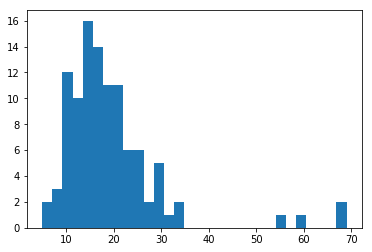

In [211]:
plt.hist(curated[curated.keys()[1]], bins = 30)

In [212]:
np.std(curated[curated.keys()[1]])

10.70276205688319

# test to be removed

In [87]:
str_ = ['CLOZAPINE 25mg TABLETS(500'S)                           ','APIXABAN!2.5mg!TABLETS (60 tabs)', 'MOVICOL!SACHETS (20 sachets)', 'LITHIUM CITRATE!520mgApprox5.5mmol/5mL!SfLiqdP...', 'CLOZAPINE!50mg!TABLETS (100 tabs)(Denzapine)']

In [105]:
for s in str_:
    print(s)
    split = s.split('!')
    for t in split:
        out_ = [int(val) for val in re.findall(r'\b\d+', t)]
        if out_:
            print(out_[0])
            break

APIXABAN!2.5mg!TABLETS (60 tabs)
2
MOVICOL!SACHETS (20 sachets)
20
LITHIUM CITRATE!520mgApprox5.5mmol/5mL!SfLiqdP...
520
CLOZAPINE!50mg!TABLETS (100 tabs)(Denzapine)
50


In [92]:
test = str_[3].split('!')

In [94]:
print(test)

['CLOZAPINE', '50mg', 'TABLETS (100 tabs)(Denzapine)']


In [98]:
[int(s) for s in re.findall(r'\b\d+', '50mg')]

[50]

In [100]:
import re
for t in test:
    out_ = [int(s) for s in re.findall(r'\b\d+', t)]
    if out_:
        print(out_)

[50]
[100]


In [77]:
a = []

In [79]:
if a.is_empty():
    print('a')

AttributeError: 'list' object has no attribute 'is_empty'

# Rep grid prototype results

In [282]:
#info_study = pd.read_csv('total_06_03.csv', header=None)

In [243]:
info_study.keys()

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            135, 136, 137, 138, 139, 140, 141, 142, 143, 144],
           dtype='int64', length=145)

In [244]:
info_study.keys()

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            135, 136, 137, 138, 139, 140, 141, 142, 143, 144],
           dtype='int64', length=145)

In [247]:
info_study[2]

0    {"repgridselection":["element-0"
1    {"repgridselection":["element-0"
Name: 2, dtype: object

In [76]:
# Read the CSV file in (skipping first row).
import csv
csvFilename = 'total_last.csv'
csvRows = []
csvFileObj = open(csvFilename)
readerObj = csv.reader(csvFileObj)
for row in readerObj:
    #if readerObj.line_num == 1:
    #    continue    # skip first row
    csvRows.append(row)
csvFileObj.close()

In [77]:
len(csvRows)

158

In [79]:
def get_index_study(csvRows):
    valid_index = []
    not_valid = ['sara', 'oliver', 'undefi']
    for i, vals in enumerate(csvRows):
        if [True for i in not_valid if i in vals[0]]:
            pass
        else:
            valid_index.append(i)
    return valid_index
valid_index = get_index_study(csvRows=csvRows)
csvRows_study = [csvRows[i] for i in valid_index]

In [181]:
len(csvRows_sara_study)

16

In [180]:
def get_index_diary_study(csvRows):
    valid_index = []
    not_valid = ['sara']
    for i, vals in enumerate(csvRows):
        if [True for i in not_valid if i in vals[0]]:
            valid_index.append(i)
        else:
            pass
    return valid_index
valid_index = get_index_diary_study(csvRows=csvRows)
csvRows_sara_study = [csvRows[i] for i in valid_index]

In [80]:
def get_stress_score(csvRows):
    opposite = [3,4,6,7]
    scores_ = []
    for ind in csvRows:
        score = 0
        for i, vals in enumerate(ind):
            if "percieved-stress0" in vals:
                start = i
                break
        stress_score = ind[start:start+10]
        for i, vals in enumerate(stress_score):
            aux = 0
            if "never" in vals and "almost never" not in vals:
                aux=0
            elif "almost never" in vals:
                aux=1
            elif "sometimes" in vals:
                aux=2
            elif "fairly often" in vals:
                aux=3
            elif "very often" in vals:
                aux=4
            if i in opposite:
                score+=abs(aux-4)
            else: 
                if i not in opposite:
                    score+=aux
        scores_.append(score)
    return scores_
scores_ = get_stress_score(csvRows=csvRows_study)

In [81]:
#plt.hist(scores_)
print('no stress')
print(len([i for i in scores_ if i <13]))
print('moderate stress')
print(len([i for i in scores_ if i >=13 and i<=26]))
print('high stress')
print(len([i for i in scores_ if i >=27]))


no stress
22
moderate stress
95
high stress
17


In [82]:
def get_time_and_rating(csvRows, string):
    total = {}
    total['time'] = []
    total['rating'] = []
    for ind in csvRows:
        total['time'].append(int(ind[1]))
        i = 0
        for str_ in ind:
            #if 'end_repodrid_result_question_1' in str_:
            #if 'identity_result_page_question_3' in str_:
            if string in str_:
                str_ = '{"'+str_
                str_ = str_.replace(':','":')
                str_ = str_+'}'
                str_ = ast.literal_eval(str_)
                #total['rating'].append(int(str_['end_repodrid_result_question_1']))
                #total['rating'].append(int(str_['identity_result_page_question_3']))
                total['rating'].append(int(str_[string]))
    return total
        

In [83]:
def get_time_and_rating_user(csvRows, string, user):
    total = {}
    total['user'] = []
    total['time'] = []
    total['rating'] = []
    for ind in csvRows:
        if user in ind[0]:
            total['user'].append(ind[0])
            total['time'].append(int(ind[1]))
            i = 0
            for str_ in ind:
                #if 'end_repodrid_result_question_1' in str_:
                #if 'identity_result_page_question_3' in str_:
                if string in str_:
                    str_ = '{"'+str_
                    str_ = str_.replace(':','":')
                    str_ = str_+'}'
                    str_ = ast.literal_eval(str_)
                    #total['rating'].append(int(str_['end_repodrid_result_question_1']))
                    #total['rating'].append(int(str_['identity_result_page_question_3']))
                    total['rating'].append(int(str_[string]))
    return total
        

In [84]:
def get_time_and_feel(csvRows, string):
    total = {}
    total['time'] = []
    total['rating'] = []
    for ind in csvRows:
        total['time'].append(int(ind[1]))
        i = 0
        for str_ in ind:
            #if 'end_repodrid_result_question_1' in str_:
            #if 'identity_result_page_question_3' in str_:
            if string in str_:
                str_ = '{"'+str_
                str_ = str_.replace(':','":')
                str_ = str_+'}'
                str_ = ast.literal_eval(str_)
                #total['rating'].append(int(str_['end_repodrid_result_question_1']))
                #total['rating'].append(int(str_['identity_result_page_question_3']))
                if 'Worse' in str_[string]:
                    total['rating'].append(-1)
                if 'Same' in str_[string]:
                    total['rating'].append(0)
                if 'Better' in str_[string]:
                    total['rating'].append(1)
                    
    return total

In [188]:
import ast
import numpy as np
time_rating = get_time_and_rating(csvRows=csvRows_study, string = 'end_repodrid_result_question_1')
#time_rating = get_time_and_rating(csvRows=csvRows_study, string = 'identity_result_page_question_3')
#time_rating = get_time_and_rating_user(csvRows=csvRows_study, string = 'end_repodrid_result_question_1', user='sara')
#time_rating = get_time_and_feel(csvRows=csvRows, string = 'end_repodrid_result_question_2')

In [165]:
aux_1 = time_rating

In [189]:
np.median(np.array(aux_1['time']))

18.0

In [167]:
aux_1['rating'] = np.array(aux_1['rating'])

In [191]:
len(csvRows_study)

134

In [168]:
ind_ = aux_1['time']>=0

(array([ 3.,  6.,  7.,  6.,  6., 17., 21., 17., 20., 31.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

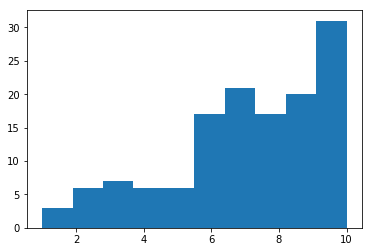

In [454]:
plt.hist(aux_1['rating'], bins = 10)

In [190]:
csvRows_study[0]

['GmFzhmi5 ',
 ' 14 ',
 '{"repgridselection":["element-0"',
 'element-1',
 'element-11',
 'element-4',
 'element-12',
 'element-13]',
 'marital_status:"Married"',
 'gender:"Female"',
 'age:31',
 'number_of_kids:1',
 'percieved-stress0:"almost never"',
 'percieved-stress1:"sometimes"',
 'percieved-stress2:"almost never"',
 'percieved-stress3:"fairly often"',
 'percieved-stress4:"fairly often"',
 'percieved-stress5:"almost never"',
 'percieved-stress6:"fairly often"',
 'percieved-stress7:"fairly often"',
 'percieved-stress8:"almost never"',
 'percieved-stress9:"almost never"',
 'stressful-situations-Punctual:"stressful"',
 'stressful-situations-Organised:"stressful"',
 'stressful-situations-Hardworking:"very stressful"',
 'stressful-situations-TeamPlayer:"very stressful"',
 'stressful-situations-Serious:"stressful"',
 'stressful-situations-Playful:"very stressful"',
 'stressful-situations-Thoughtful:"stressful"',
 'stressful-situations-Spontaneous:"stressful"',
 'stressful-situations-Hel

In [446]:
np.median(aux_1['rating'][ind_])

8.0

In [430]:
sum(aux_1['rating'][ind_]>=9)

50

In [172]:
sum(df['gender']=='Male')

52

In [173]:
sum(df['gender']=='Female')

82

In [431]:
sum(aux_1['rating'][ind_]<=6)

45

In [169]:
(sum(aux_1['rating'][ind_]>=9) - sum(aux_1['rating'][ind_]<=6))/sum(ind_)*100

3.731343283582089

In [428]:
len(time_rating['rating'][ind_])

134

In [170]:
a = [100-7, 100-7.6, 100-13.1, 100-8.4, 100-16.2]

In [171]:
np.mean(a)

89.53999999999999

In [421]:
sum(np.array(time_rating['rating'])<=6)

45

In [422]:
(sum(np.array(time_rating['rating'])>=9) - sum(np.array(time_rating['rating'])<=6))/len(time_rating['rating'])*100

4.477611940298507

# stress score

In [455]:
vals_ = get_stress_score(csvRows=csvRows_study)

(array([ 3.,  8., 16., 21., 31., 26., 17.,  6.,  4.,  2.]),
 array([ 3. ,  6.5, 10. , 13.5, 17. , 20.5, 24. , 27.5, 31. , 34.5, 38. ]),
 <a list of 10 Patch objects>)

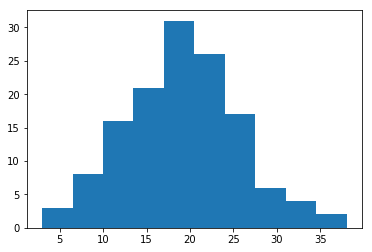

In [456]:
plt.hist(vals_)

# get age

In [91]:
csvRows_study[0]

['GmFzhmi5 ',
 ' 14 ',
 '{"repgridselection":["element-0"',
 'element-1',
 'element-11',
 'element-4',
 'element-12',
 'element-13]',
 'marital_status:"Married"',
 'gender:"Female"',
 'age:31',
 'number_of_kids:1',
 'percieved-stress0:"almost never"',
 'percieved-stress1:"sometimes"',
 'percieved-stress2:"almost never"',
 'percieved-stress3:"fairly often"',
 'percieved-stress4:"fairly often"',
 'percieved-stress5:"almost never"',
 'percieved-stress6:"fairly often"',
 'percieved-stress7:"fairly often"',
 'percieved-stress8:"almost never"',
 'percieved-stress9:"almost never"',
 'stressful-situations-Punctual:"stressful"',
 'stressful-situations-Organised:"stressful"',
 'stressful-situations-Hardworking:"very stressful"',
 'stressful-situations-TeamPlayer:"very stressful"',
 'stressful-situations-Serious:"stressful"',
 'stressful-situations-Playful:"very stressful"',
 'stressful-situations-Thoughtful:"stressful"',
 'stressful-situations-Spontaneous:"stressful"',
 'stressful-situations-Hel

In [92]:
def get_age(csvRows):
    gender = []
    for ind in csvRows:
        for i, vals in enumerate(ind):
            if "age:" in vals:
                gender.append(int(vals.split(":")[1]))
    return gender
age = get_age(csvRows_study)

# get gender

In [458]:
csvRows_study[0][9]

'gender:"Female"'

In [182]:
def get_gender(csvRows):
    gender = []
    for ind in csvRows:
        for i, vals in enumerate(ind):
            if "gender" in vals:
                if "Male" in vals:
                    gender.append('Male')
                if "Female" in vals:
                    gender.append('Female')
                if "Other" in vals:
                    gender.append('Other')
    return gender
gender = get_gender(csvRows_sara_study)

In [187]:
gender

['Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male']

(array([82.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 52.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

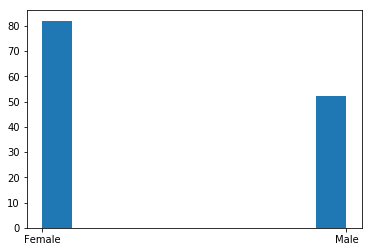

In [469]:
plt.hist(gender)

# get marital status

In [125]:
csvRows_study[0]

['GmFzhmi5 ',
 ' 14 ',
 '{"repgridselection":["element-0"',
 'element-1',
 'element-11',
 'element-4',
 'element-12',
 'element-13]',
 'marital_status:"Married"',
 'gender:"Female"',
 'age:31',
 'number_of_kids:1',
 'percieved-stress0:"almost never"',
 'percieved-stress1:"sometimes"',
 'percieved-stress2:"almost never"',
 'percieved-stress3:"fairly often"',
 'percieved-stress4:"fairly often"',
 'percieved-stress5:"almost never"',
 'percieved-stress6:"fairly often"',
 'percieved-stress7:"fairly often"',
 'percieved-stress8:"almost never"',
 'percieved-stress9:"almost never"',
 'stressful-situations-Punctual:"stressful"',
 'stressful-situations-Organised:"stressful"',
 'stressful-situations-Hardworking:"very stressful"',
 'stressful-situations-TeamPlayer:"very stressful"',
 'stressful-situations-Serious:"stressful"',
 'stressful-situations-Playful:"very stressful"',
 'stressful-situations-Thoughtful:"stressful"',
 'stressful-situations-Spontaneous:"stressful"',
 'stressful-situations-Hel

In [95]:
def get_marital_status(csvRows):
    gender = []
    for ind in csvRows:
        for i, vals in enumerate(ind):
            if "marital_status" in vals:
                if "Single" in vals:
                    gender.append('Single')
                if "Married" in vals:
                    gender.append('Married')
                if "Divorced" in vals:
                    gender.append('Divorced')
                if "Widowed" in vals:
                    gender.append('Widowed')
    return gender
mar = get_marital_status(csvRows_study)

(array([50.,  0.,  0., 79.,  0.,  0.,  4.,  0.,  0.,  1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

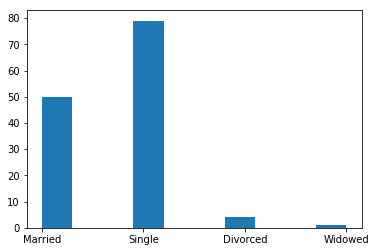

In [475]:
plt.hist(mar)

# get number of kids

In [98]:
def get_num_kids(csvRows):
    gender = []
    for ind in csvRows:
        for i, vals in enumerate(ind):
            if "number_of_kids" in vals:
                gender.append(int(vals.split(":")[1]))
    return gender
num_kids = get_num_kids(csvRows_study)

(array([72.,  0., 28.,  0.,  0., 27.,  0.,  6.,  0.,  1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

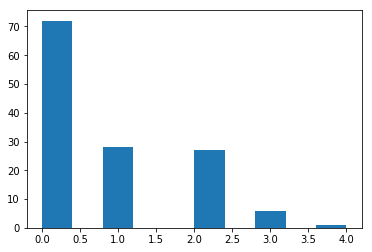

In [482]:
plt.hist(num_kids)

# Get most selected elements

In [192]:
dict_element = dict()

In [276]:
dict_element = dict()
dict_element[0]="Myself right now"
dict_element[1]="Myself as I would like to be"
dict_element[2]="Myself in a normal work day"
dict_element[3]="Myself before an important deadline"
dict_element[4]="Myself with my boss"
dict_element[5]="Myself with a coworker I dislike"
dict_element[6]="Myself with a coworker I like"
dict_element[7]="Myself in a tense meeting"
dict_element[8]="Myself after a bad day"
dict_element[9]="Myself after a good day"
dict_element[10]="Myself doing a presentation"
dict_element[11]="Myself with lack of money"
dict_element[12]="Myself with my family"
dict_element[13]="Myself with my friends"

In [201]:
csvRows_study[0]

['GmFzhmi5 ',
 ' 14 ',
 '{"repgridselection":["element-0"',
 'element-1',
 'element-11',
 'element-4',
 'element-12',
 'element-13]',
 'marital_status:"Married"',
 'gender:"Female"',
 'age:31',
 'number_of_kids:1',
 'percieved-stress0:"almost never"',
 'percieved-stress1:"sometimes"',
 'percieved-stress2:"almost never"',
 'percieved-stress3:"fairly often"',
 'percieved-stress4:"fairly often"',
 'percieved-stress5:"almost never"',
 'percieved-stress6:"fairly often"',
 'percieved-stress7:"fairly often"',
 'percieved-stress8:"almost never"',
 'percieved-stress9:"almost never"',
 'stressful-situations-Punctual:"stressful"',
 'stressful-situations-Organised:"stressful"',
 'stressful-situations-Hardworking:"very stressful"',
 'stressful-situations-TeamPlayer:"very stressful"',
 'stressful-situations-Serious:"stressful"',
 'stressful-situations-Playful:"very stressful"',
 'stressful-situations-Thoughtful:"stressful"',
 'stressful-situations-Spontaneous:"stressful"',
 'stressful-situations-Hel

In [282]:
res_elements = []

for ind in csvRows_study:
    for i, vals in enumerate(ind):
        if "repgridselection" in vals:
            start = i
        if "marital_status" in vals:
            res_elements.append(ind[start:i])

In [283]:
res_elements[1]

['{"repgridselection":["element-0"',
 'element-1',
 'element-13',
 'element-12',
 'element-2',
 'element-9]']

In [284]:
int_res_elements = []
for vals in res_elements:
    j = 0
    for v in vals:
        try:
            ind_ = v.find('-')
            ind_+=1
            int_res_elements.append(int(v[ind_:ind_+2]))
        except:
            try:
                int_res_elements.append(int(v[ind_:ind_+1]))
            except:
                break

In [308]:
selected_elements = []
for i in int_res_elements:
    #if i >1:
    selected_elements.append(dict_element[i])

(array([93., 96., 77., 48., 56., 53., 40., 24., 23., 35.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

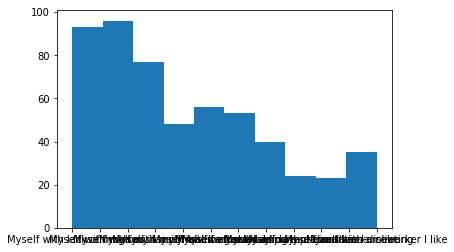

In [293]:
plt.hist(selected_elements)

# Pretty histograms

In [86]:
df = pd.DataFrame()

In [87]:
df['stress_score'] = get_stress_score(csvRows=csvRows_study)

In [94]:
df['age'] = get_age(csvRows_study)

In [96]:
df['marital_status'] = get_marital_status(csvRows_study)

In [99]:
df['num_kids'] = get_num_kids(csvRows_study)

In [102]:
df['gender'] = get_gender(csvRows_study)

In [1]:
import plotly.express as px
df = px.data.tips()

In [2]:
type(df)

pandas.core.frame.DataFrame

In [104]:
fig = px.histogram(df, x="age", color="gender")
fig.show()

In [307]:
csvRows_sara_study

[['sara_qB80gCPt ',
  ' 16 ',
  '{"repgridselection":["element-0"',
  'element-1',
  'element-11',
  'element-9',
  'element-13',
  'element-12]',
  'marital_status:"Single"',
  'gender:"Male"',
  'age:42',
  'number_of_kids:0',
  'percieved-stress0:"sometimes"',
  'percieved-stress1:"sometimes"',
  'percieved-stress2:"fairly often"',
  'percieved-stress3:"fairly often"',
  'percieved-stress4:"fairly often"',
  'percieved-stress5:"almost never"',
  'percieved-stress6:"fairly often"',
  'percieved-stress7:"fairly often"',
  'percieved-stress8:"sometimes"',
  'percieved-stress9:"sometimes"',
  'stressful-situations-Punctual:"stressful"',
  'stressful-situations-Organised:"stressful"',
  'stressful-situations-Hardworking:"stressful"',
  'stressful-situations-TeamPlayer:"somewhat stressful"',
  'stressful-situations-Serious:"somewhat stressful"',
  'stressful-situations-Playful:"somewhat stressful"',
  'stressful-situations-Thoughtful:"stressful"',
  'stressful-situations-Spontaneous:"stre

In [107]:
ind_ = df['gender']=='Female'

In [111]:
min(df['stress_score'])

3

In [124]:
import plotly.graph_objects as go

import numpy as np
ind_ = df['marital_status']=='Married'
x0 = df['stress_score'][ind_]
ind_ = df['marital_status']!='Married'
x1 = df['stress_score'][ind_]

fig = go.Figure()
fig.add_trace(go.Histogram(
    x=x0,
    histnorm='percent',
    name='Female', # name used in legend and hover labels
    xbins=dict( # bins used for histogram
        start=0,
        end=60,
        size=4
    ),
    marker_color='#EB89B5',
    opacity=0.75
))
fig.add_trace(go.Histogram(
    x=x1,
    histnorm='percent',
    name='Male',
    xbins=dict(
        start=0,
        end=60,
        size=4
    ),
    marker_color='#330C73',
    opacity=0.75
))

fig.update_layout(
    #title_text='Stress score', # title of plot
    xaxis_title_text='Age', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)

fig.show()

In [138]:
import plotly.graph_objects as go

import numpy as np

# Use `y` argument instead of `x` for horizontal histogram

#fig, ax = plt.subplots(figsize=(10,8))
fig = go.Figure(data=[go.Histogram(y=df['marital_status'])])
fig.show()

In [157]:
import plotly.express as px
# Here we use a column with categorical data
fig = px.histogram(df, x="nps_identity")
fig.show()

In [313]:
fig = px.histogram(df_2, x="SelectedElements").update_xaxes(categoryorder="total descending")
fig.show()

In [302]:
a = [100-19.7,100-19.5,100-23.8,100-23.8]

In [306]:
100-19.4

80.6

In [303]:
np.median(a)

78.25

In [305]:
np.mean(a)

78.3

In [311]:
df_2 = pd.DataFrame()

In [312]:
df_2['SelectedElements']=selected_elements

In [130]:
?go.Histogram

In [297]:
fig = go.Figure(data=[go.Histogram(y=df_2['SelectedElements'])])
fig.show()

In [146]:
len(time_rating['rating'])

NameError: name 'time_rating' is not defined

In [80]:
sum(np.array(time_rating['rating'])<=6)

8

In [81]:
sum(np.array(time_rating['rating'])>=9)

3

In [305]:
(sum(np.array(time_rating['rating'])>=9) - sum(np.array(time_rating['rating'])<=6))/len(time_rating['rating'])*100

4.477611940298507

In [23]:
aux_2 = time_rating[time_rating['time']>=0]

TypeError: '>=' not supported between instances of 'list' and 'int'

In [590]:
len(total)

119

In [695]:
aux_2 = np.array(time_rating)

In [696]:
(sum(aux_2['rating']>=9) - sum(aux_2['rating']<=6))/len(aux_2['rating'])*100

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [627]:
sum(aux_2['rating']==-1)/len(aux_2['rating'])

0.03361344537815126

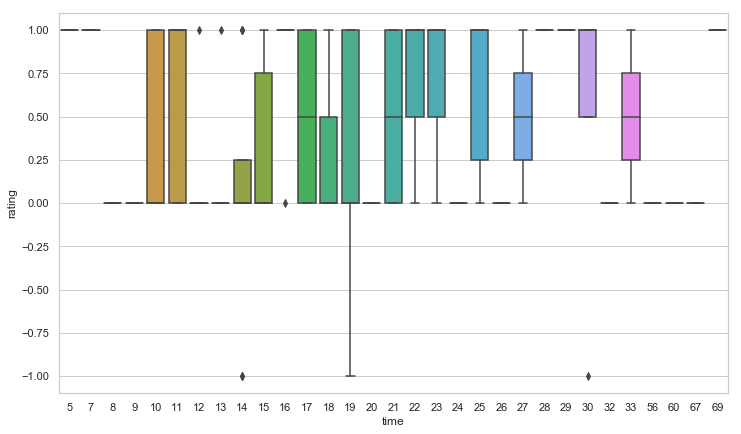

In [599]:
plt.figure(figsize=(12,7))
ax = sns.boxplot(x="time", y="rating", data=total)

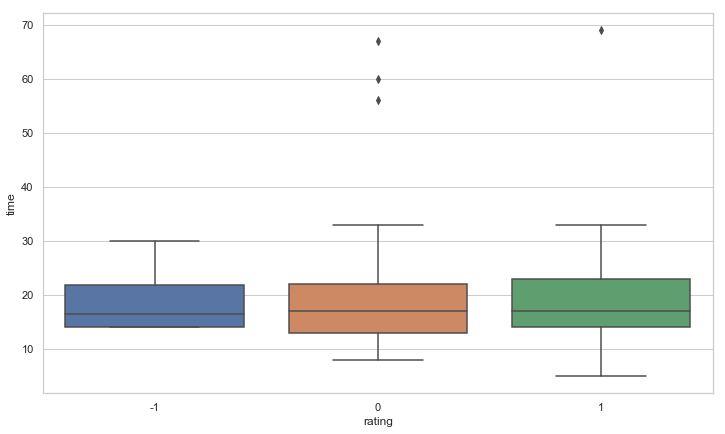

In [600]:
plt.figure(figsize=(12,7))
ax = sns.boxplot(x="rating", y="time", data=total)

In [607]:
sum(aux_2['rating']==1)/len(aux_2['rating'])

0.01282051282051282

In [629]:
sum(total['time']<15)

41

# Data frame that will store all the information regarding the participants

In [246]:
df_study = pd.DataFrame()

In [247]:
df_study['stress_scores'] = get_stress_score(csvRows=csvRows_study)